## Covid 19 Weekly Hospitalizations - USA

In [2]:
## Time series analyis for trend

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy

In [20]:
# read the dataset
df = pd.read_csv("data_table_for_weekly_covid19_hospital_admissions_usa.csv",skiprows=2,parse_dates=[1])

In [21]:
# view few rows
df.head()

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,2024-02-10,21373.0
1,United States,2024-02-03,21204.0
2,United States,2024-01-27,23295.0
3,United States,2024-01-20,25976.0
4,United States,2024-01-13,31144.0


In [24]:
# rename columns to lower case readable
df = df.rename({
    "Geography":"country",
    "Date":"date",
    "Weekly COVID-19 Hospital Admissions":"hosp_admissions"
}, axis="columns")

In [25]:
df.head()

,country,date,hosp_admissions
0,United States,2024-02-10,21373.0
1,United States,2024-02-03,21204.0
2,United States,2024-01-27,23295.0
3,United States,2024-01-20,25976.0
4,United States,2024-01-13,31144.0


In [26]:
# convert to time series
df.index = df["date"]

In [27]:
df.head()

,country,date,hosp_admissions
date,,,
2024-02-10,United States,2024-02-10,21373.0
2024-02-03,United States,2024-02-03,21204.0
2024-01-27,United States,2024-01-27,23295.0
2024-01-20,United States,2024-01-20,25976.0
2024-01-13,United States,2024-01-13,31144.0


In [34]:
# Missing hospitalizations means no hospitalization
df["hosp_admissions"] = df["hosp_admissions"].fillna(0)

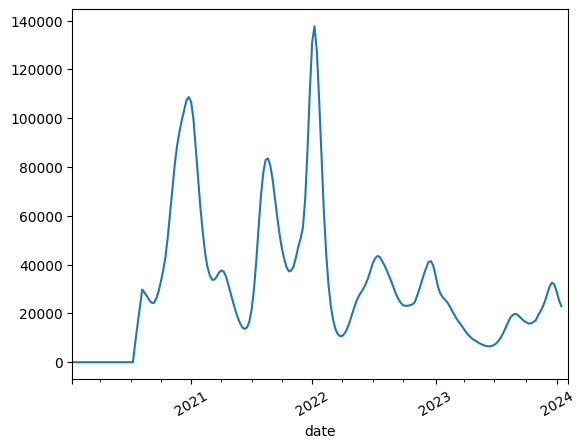

In [48]:
#get 7 day rolling average
rolling_mean = df["hosp_admissions"].rolling(4).mean()

# plt.scatter(df.index, df["hosp_admissions"])
rolling_mean.plot()
plt.xticks(rotation=30)
plt.show()

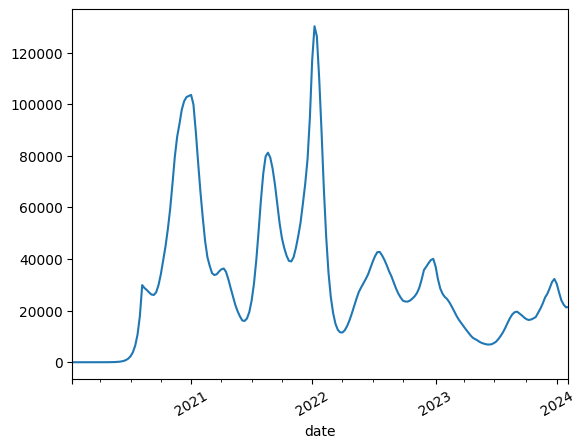

In [53]:
# EWMA
ewm_mean = df["hosp_admissions"].ewm(span=4).mean()
ewm_mean.plot()
plt.xticks(rotation=30)
plt.show()

In [62]:
def serial_corr(df, lag):
    
    xs = df[df["hosp_admissions"] > 0][lag:]
    ys = xs.shift(lag)
    print(xs.shape, ys.shape)
    return scipy.stats.pearsonr(xs,ys)

In [ ]:
serial_corr(df,1)